# Predicting house prices with pycaret

Daniel Kapitan  
2023-10-21

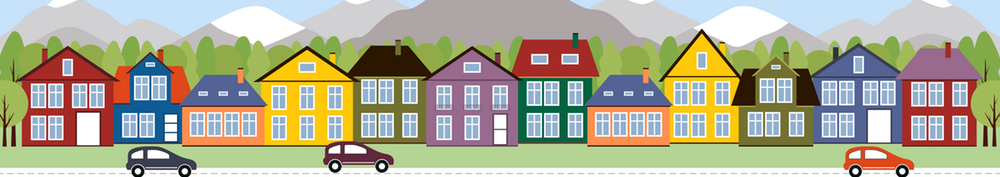

## Objectives

-   Example end-to-end supervised learning workflow with Ames Housing
    dataset
-   Focus on conceptual understanding of machine learning
-   Demonstrate use of Predictive Power Score (PPS)
-   Demonstrate capabilities of low-code tools

## Attribution

### Dataset

-   Ames Housing dataset paper ([original
    paper](../../resources/decock2011ames.pdf))
-   Kaggle competition advanced regression techniques
    ([link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques))

### Python libraries

-   Altair ([docs](https://altair-viz.github.io/))
-   ydata-profiling ([docs](https://docs.profiling.ydata.ai/4.6/))
-   Predictive Power Score (PPS,
    [GitHub](https://github.com/8080labs/ppscore/),
    [blog](https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598))
-   PyCaret: open-source, low-code machine learning library in Python
    that automates machine learning workflows
    ([link](https://pycaret.org/))

In [4]:
import altair as alt
import pandas as pd
import ppscore as pps
from pycaret.regression import *
from ydata_profiling import ProfileReport


# customize Altair
def y_axis():
    return {
        "config": {
            "axisX": {"grid": False},
            "axisY": {
                "domain": False,
                "gridDash": [2, 4],
                "tickSize": 0,
                "titleAlign": "right",
                "titleAngle": 0,
                "titleX": -5,
                "titleY": -10,
            },
            "view": {
                "stroke": "transparent",
                # To keep the same height and width as the default theme:
                "continuousHeight": 300,
                "continuousWidth": 400,
            },
        }
    }


alt.themes.register("y_axis", y_axis)
alt.themes.enable("y_axis")


def get_descriptions():
    "Parse descriptions of columns of Ames Housing dataset"
    with open("data_description.txt") as reader:
        descriptions = {}
        for line in reader.readlines():
            if ":" in line and "2nd level" not in line:
                descriptions[line.split(": ")[0].strip()] = line.split(": ")[1].strip()
    return pd.Series(descriptions).rename("descriptions")


descriptions = get_descriptions()

## Read and explore the data

In [5]:
%%time
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
profile = ProfileReport(train, minimal=True, title="Ames Housing Profiling Report")
profile.to_file("ames-housing-profiling-report-minimal.html")

CPU times: user 45 s, sys: 1.78 s, total: 46.7 s
Wall time: 16.4 s

In [6]:
profile.to_notebook_iframe()

<iframe width="100%" height="800px" srcdoc="<!doctype html><html lang=en><head><meta charset=utf-8><meta name=viewport content="width=device-width, initial-scale=1, shrink-to-fit=no"><meta name=description content="Profile report generated by YData! Visit us at https://ydata.ai"><meta name=author content="YData and the open source community."><meta name=generator content="Pandas Profiling vv4.6.1"><meta name=url content=https://github.com/ydataai/ydata-profiling><meta name=date content="2023-10-31 20:59:03.554207"><title>Ames Housing Profiling Report</title><style>
/*!
 * Bootstrap v3.3.7 (http://getbootstrap.com)
 * Copyright 2011-2016 Twitter, Inc.
 * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)
 *//*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,hgroup,main,menu,nav,section,summary{display:block}audio,canvas,progress,video{display:inline-block;vertical-align:baseline}audio:not([controls]){display:none;height:0}[hidden],template{display:none}a{background-color:transparent}a:active,a:hover{outline:0}abbr[title]{border-bottom:1px dotted}b,strong{font-weight:700}dfn{font-style:italic}h1{margin:.67em 0;font-size:2em}mark{color:#000;background:#ff0}small{font-size:80%}sub,sup{position:relative;font-size:75%;line-height:0;vertical-align:baseline}sup{top:-.5em}sub{bottom:-.25em}img{border:0}svg:not(:root){overflow:hidden}figure{margin:1em 40px}hr{height:0;-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box}pre{overflow:auto}code,kbd,pre,samp{font-family:monospace,monospace;font-size:1em}button,input,optgroup,select,textarea{margin:0;font:inherit;color:inherit}button{overflow:visible}button,select{text-transform:none}button,html input[type=button],input[type=reset],input[type=submit]{-webkit-appearance:button;cursor:pointer}button[disabled],html input[disabled]{cursor:default}button::-moz-focus-inner,input::-moz-focus-inner{padding:0;border:0}input{line-height:normal}input[type=checkbox],input[type=radio]{-webkit-box-sizing:border-box;-moz-box-sizing:border-box;box-sizing:border-box;padding:0}input[type=number]::-webkit-inner-spin-button,input[type=number]::-webkit-outer-spin-button{height:auto}input[type=search]{-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box;-webkit-appearance:textfield}input[type=search]::-webkit-search-cancel-button,input[type=search]::-webkit-search-decoration{-webkit-appearance:none}fieldset{padding:.35em .625em .75em;margin:0 2px;border:1px solid silver}legend{padding:0;border:0}textarea{overflow:auto}optgroup{font-weight:700}table{border-spacing:0;border-collapse:collapse}td,th{padding:0}/*! Source: https://github.com/h5bp/html5-boilerplate/blob/master/src/css/main.css */@media print{*,:after,:before{color:#000!important;text-shadow:none!important;background:0 0!important;-webkit-box-shadow:none!important;box-shadow:none!important}a,a:visited{text-decoration:underline}a[href]:after{content:" (" attr(href) ")"}abbr[title]:after{content:" (" attr(title) ")"}a[href^="javascript:"]:after,a[href^="#"]:after{content:""}blockquote,pre{border:1px solid #999;page-break-inside:avoid}thead{display:table-header-group}img,tr{page-break-inside:avoid}img{max-width:100%!important}h2,h3,p{orphans:3;widows:3}h2,h3{page-break-after:avoid}.navbar{display:none}.btn>.caret,.dropup>.btn>.caret{border-top-color:#000!important}.label{border:1px solid #000}.table{border-collapse:collapse!important}.table td,.table th{background-color:#fff!important}.table-bordered td,.table-bordered th{border:1px solid #ddd!important}}@font-face{font-family:'Glyphicons Halflings';src:url(../fonts/glyphicons-halflings-regular.eot);src:url(../fonts/glyphicons-halflings-regular.eot?#iefix) format('embedded-opentype'),url(../fonts/glyphicons-halflings-regular.woff2) format('woff2'),url(

## Investigate features with largest predictive power

We use the Predictive Power Score to evaluate which features have the
highest predictive power with respect to `SalePrice`.

In [7]:
predictors = (
    pps.predictors(train, "SalePrice")
    .round(3)
    .iloc[:, :-1]
    .merge(descriptions, how="left", left_on="x", right_index=True)
)
base = (
    alt.Chart(predictors)
    .encode(
        x=alt.Y("x:N").sort("-y"),
        y="ppscore",
        tooltip=["x", "ppscore", "descriptions"],
    )
    .transform_filter("datum.ppscore > 0")
)
base.mark_bar() + base.mark_text(align="center", dy=-5)

## Investigate colinearity

In [8]:
pps_matrix = (
    pps.matrix(
        train.loc[:, predictors.query("ppscore > 0")["x"].tolist()],
    )
    .loc[:, ["x", "y", "ppscore"]]
    .round(3)
)
(
    alt.Chart(pps_matrix)
    .mark_rect()
    .encode(
        x="x:O",
        y="y:O",
        color="ppscore:Q",
        tooltip=["x", "y", "ppscore"])
)

## Build models

We select the 30 features that have the highest predictive power score

In [9]:
selected_predictors = (
    predictors.sort_values("ppscore", ascending=False).head(30)["x"].to_list()
)
reg = setup(data = train.loc[:, selected_predictors + ["SalePrice"]], 
             target = 'SalePrice',
             numeric_imputation = 'mean',
             categorical_features =  list(train.loc[:, selected_predictors].select_dtypes("object").columns), 
             feature_selection = False,
             pca=False,
             remove_multicollinearity=True,
             remove_outliers = False,
             normalize = True,
             )

In [10]:
%%time
selected_models = [model for model in models().index if model not in ["lar", "lr", "ransac"]]
best_model = compare_models(sort='RMSLE', include=selected_models)

CPU times: user 4.09 s, sys: 446 ms, total: 4.53 s
Wall time: 1min 3s

## Evaluation

-   With a standard, AutoML-like workflow, we achive RMSLE of 0.13 -
    0.14 (over different runs), which is already in the top 25% of the
    4,200 submissions on the leaderboard
-   We can now make predictions on the test set

In [11]:
predictions = (
    predict_model(best_model, data=test)
    .rename(columns={"prediction_label": "SalePrice"})
    .loc[:, ["Id", "SalePrice"]]
)
predictions.head()

### Pipeline

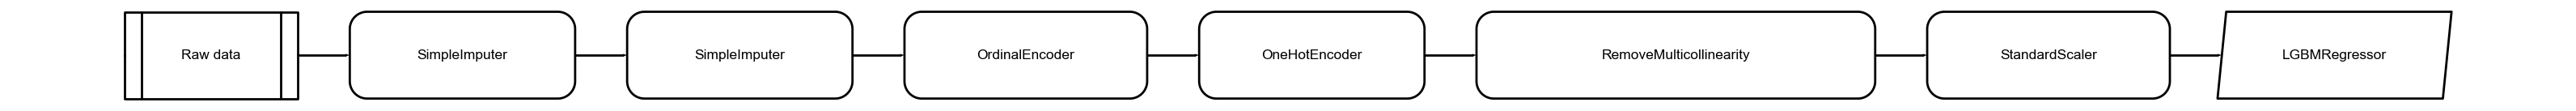

In [12]:
plot_model(best_model, 'pipeline')

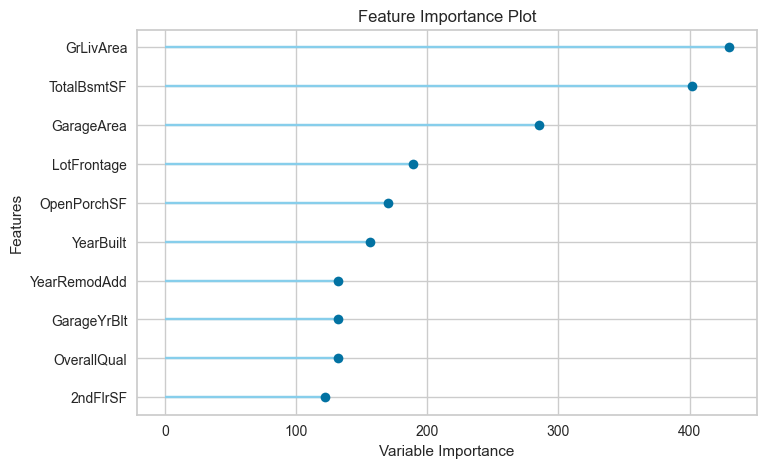

In [13]:
plot_model(best_model, 'feature')

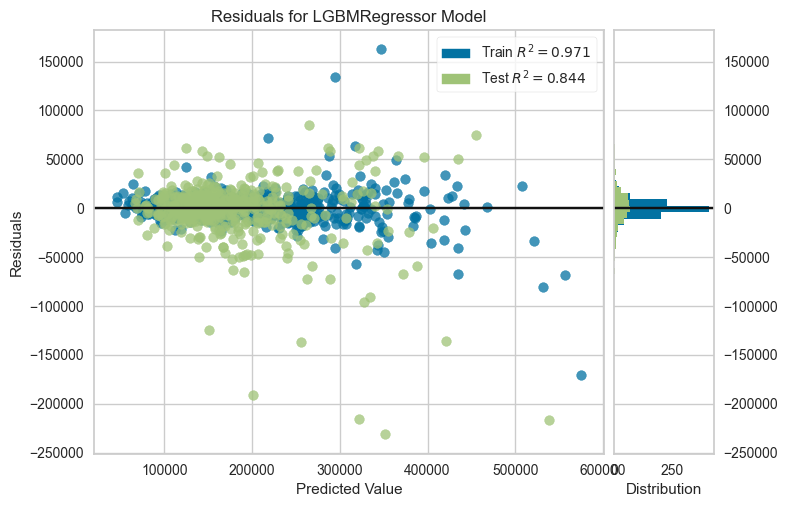

In [14]:
plot_model(best_model, 'residuals')